In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Lode Data

In [4]:
pd.read_csv("student_info.csv")

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75


In [5]:
df = pd.read_csv("student_info.csv")


In [6]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.tail()

,study_hours,student_marks
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [8]:
df.shape

(199, 2)

# Discover and Visualize the data to gain insights

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
study_hours      194 non-null float64
student_marks    199 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
df.describe()

,study_hours,student_marks
count,194.000000,199.000000
mean,6.988969,77.905779
std,1.252496,4.922173
min,5.010000,68.570000
25%,5.767500,73.370000
50%,7.110000,77.650000
75%,8.077500,82.285000
max,8.990000,86.990000


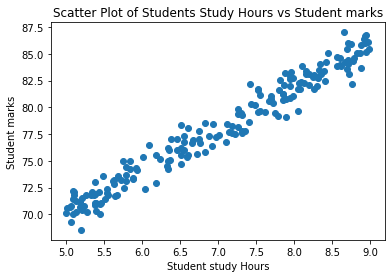

In [11]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Student study Hours")
plt.ylabel("Student marks")
plt.title("Scatter Plot of Students Study Hours vs Student marks")
plt.show()

# Prepare data for Machine Learning Algorithm

# Data Cleaning

In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
df.mean()

study_hours       6.988969
student_marks    77.905779
dtype: float64

In [14]:
df2 = df.fillna(df.mean())

In [15]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [16]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.988969,78.68
3,5.670000,71.82
4,8.670000,84.19


# Split Dataset

In [17]:
x= df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X:", x.shape)
print("shape of y:",y.shape)


shape of X: (199, 1)
shape of y: (199, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state= 51)
print("Shape of X train", X_train.shape)
print("Shape of Y train", Y_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of Y test", Y_test.shape)

Shape of X train (159, 1)
Shape of Y train (159, 1)
Shape of X test (40, 1)
Shape of Y test (40, 1)


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.coef_

array([[3.86119855]])

In [22]:
lr.intercept_

array([51.05135811])

In [23]:
m = 3.86
c = 51.05
y = m * 4 +c
y

66.49

In [24]:
lr.predict([[4]])[0].round(2)

array([66.5])

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([[78.4658678 ],
       [71.63154637],
       [83.44681392],
       [85.76353305],
       [85.53186114],
       [83.29236598],
       [72.13350218],
       [75.64719286],
       [73.29186175],
       [78.54309177],
       [76.49665654],
       [72.86712991],
       [71.86321828],
       [72.78990593],
       [81.40037869],
       [84.52794952],
       [76.76694044],
       [82.67457421],
       [73.63936961],
       [84.60517349],
       [72.0948902 ],
       [70.62763475],
       [82.55873826],
       [80.8598109 ],
       [81.1300948 ],
       [78.03715534],
       [77.77085206],
       [81.40037869],
       [78.96782361],
       [78.03715534],
       [71.78599431],
       [70.70485872],
       [78.62031574],
       [74.91356514],
       [81.55482664],
       [73.75520557],
       [71.09097857],
       [85.60908511],
       [85.33880121],
       [71.20681453]])

In [26]:
pd.DataFrame(np.c_[X_test, Y_test, y_pred], columns =["study_hours", "student_marks_original", "student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,7.100000,76.76,78.465868
1,5.330000,71.85,71.631546
2,8.390000,83.37,83.446814
3,8.990000,85.46,85.763533
4,8.930000,85.96,85.531861
5,8.350000,83.08,83.292366
6,5.460000,71.10,72.133502
7,6.370000,75.04,75.647193
8,5.760000,72.46,73.291862
9,7.120000,78.42,78.543092


# Final Tune Model

In [27]:
lr.score(X_test, Y_test)

0.9585824440339851

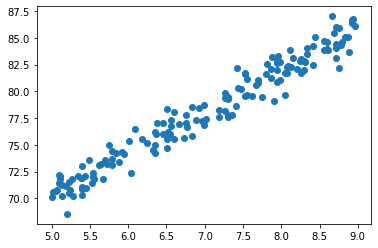

In [28]:
plt.scatter(X_train, Y_train)

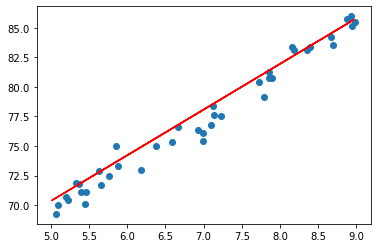

In [29]:
plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

# present your solution

# Save ML model

In [30]:
import joblib
joblib.dump(lr, "Student_marks_predictor_model.pkl")

['Student_marks_predictor_model.pkl']

In [31]:
model = joblib.load("Student_marks_predictor_model.pkl")

In [32]:
model.predict([[5]])[0][0]

70.35735084972256